# ClearWater-Riverine Demo 3 (part 1): Coupling Transport to Water Quality Reactions with ClearWater-Modules

**Objective**: Demonstrate a more complex scenario of coupled transport and reaction models in Sumwere Creek, using the [ClearWater-modules](https://github.com/EcohydrologyTeam/ClearWater-modules) to simulate water quality concentrations related to nutrients.

This third notebook builds on the previous two notebooks using [ClearWater-riverine](https://github.com/EcohydrologyTeam/ClearWater-riverine) provided in demo notebook 1 and 2.

## Background 
This notebook couples Clearwater-riverine (transport) with Clearwater-modules (reactions) - specifically, the Nutrient Simulation Model I (NSMI). The NSMI is an essential component of ClearWater (Corps Library for Environmental Analysis and Restoration of Watersheds). NSMI plays a crucial role in simulating and predicting water quality constituents concentrations within aquatic ecosystems. The NSMI was designed to conduct an aquatic eutrophication simulation
with simplified processes and minimum state variables. The NSMI predicts algae and benthic algae biomass, simple nitrogen and phosphorus cycles, organic carbon, carbonaceous biochemical oxygen demand, dissolved oxygen and pathogen using 16 state variables. These state variables can be selected to be "on" or "off" for custom application of the model.

## Example Case Study

This example shows how to run Clearwater Riverine coupled with Clearwater Modules in a fictional location, "Sumwere Creek" (shown below). The flow field for Sumwere Creek comes from a HEC-RAS 2D model, which has a domain of 2x2 km and a base mesh cell size of 100x100 meters. 

![image.png](../docs/imgs/SumwereCreek_coarse.png)

The upstream boundary for Sumwere Creek is at the top left of the model domain, flowing into the domain at a constant 3 cms. At the first bend in the creek, there is an additional boundary representing a spring-fed tributary to the creek (1 cms). Further downstream, there is a meander in the stream forming a slow-flowing oxbow lake. There is another boundary flowing into that oxbow lake, representing a powerplant discharge (0.5 cms). 

The downstream boundary is a constant stage set at 20.75 meters.

In this example, the focus is on Ammonium (NH4), Nitrate (NO3), Total inorganic phosphorous (TIP), dissolved oxygen (DOX), and Algae [phytoplankton] (Ap) with all other state variables turned off.

All boundary condition concentrations for these five state variables are set to a constant value for the duration of the simulation.

| Boundary Condition | NH4 (mg/L) | NO3 (mg/L) | TIP (mg/L) | DOX (mg/L) | Ap (mg/L) |
| :----------------- | ---------: | ---------: | ---------: | ---------: | --------: |
| upstream           | 0.010      | 0.500      | 0.050      | 8.000      | 10.000    |
| downstream         | 0.010      | 0.500      | 0.050      | 8.000      | 10.000    |
| spring-fed         | 1.800      | 0.250      | 0.001      | 4.000      | 0.000     |
| powerplant         | 1.500      | 1.000      | 0.060      | 8.000      | 200.000   |

The initial condition concentrations throughout the domain for these state variables are set to the same values as the upstream boundary condition except for Ap within the oxbow lake cells which are set to 200 mg/L.

We simulate this scenario over the course of one full day, using solar radiation data from Arizona in part to compute Ap growth which helps to show off the impacts of NSMI.

At this time, every state variable (including the ones that are turned off) needs to have boundary conditions and initial conditions set for the NSMI model to initialize. The appropriate files, including for state variables switched off, have been added to the simulation directory for this use. It should be noted that place holder values were used for these switched off variables, and the user should modify the values if alternative simulations with these state variables switched on are executed. Since the Clearwater-riverine library was use to initialize the state variables in Clearwater-modules and the code in this notebook intentionally did not pass any information regarding the switched off state variables back to "riverine", the saved results from this model simulaltion will also have results for the turned off state variables, but they are only being advected/diffused and are essentially acting as tracers.

### Data Availability
All data required run this notebook is available at this [Google Drive](https://drive.google.com/drive/folders/19uCjAJPZh4g6r1ZWzk1D_B8jZGluSc4N?usp=drive_link). Please download the entire folder and place it in the `data_temp` folder of this repository to run the rest of the notebook.

## Model Set-Up
### General Imports

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
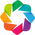

In [1]:
from pathlib import Path
import os
import logging
import numpy as np
import pandas as pd
import xarray as xr
import holoviews as hv
import geoviews as gv
from holoviews import opts
import panel as pn
hv.extension("bokeh")

from shared import process_meteo_data
from shared import setup_function_logger

In [2]:
import warnings
np.seterr(divide='ignore', invalid='ignore')
warnings.filterwarnings('ignore')

### Import ClearWater-riverine
These steps require first completing **[Installation](https://github.com/EcohydrologyTeam/ClearWater-riverine?tab=readme-ov-file#installation)** of a [conda](https://conda.io/docs/) virtual environment customized for the ClearWater-riverine library.

In [3]:
# Find project directory (i.e. the parent to `/examples` directory for this notebook)
project_path = Path.cwd().parent
project_path

WindowsPath('d:/Clearwater/ClearWater-riverine')

In [4]:
# Your source directory should be: 
src_path = project_path / 'src'
src_path

WindowsPath('d:/Clearwater/ClearWater-riverine/src')

Next, we'll need to import Clearwater Riverine. While the package is still under development, the easiest way to do this is to use the [`conda develop`](https://docs.conda.io/projects/conda-build/en/latest/resources/commands/conda-develop.html) command in the console or terminal like this, replacing the `'/path/to/module/src'` with your specific path to the source directory. In other words:
- Copy from the output of `src_path` from the cell above, and 
- Paste it after `!conda develop` in the cell below (replacing the previous user's path). 

NOTE: If your path has any blank spaces, you must enclose the path with quotes.

In [ ]:
!conda develop 'd:/Clearwater/ClearWater-riverine/src'

In [5]:
### Alternative to using "conda develop" command to populate conda.pth file

#output active environment information
conda_info_output = !conda info

#convert active environment path to a string then to a Path object
active_env_str = conda_info_output[2]
active_env_str_path = active_env_str.split(':', 1)[1].lstrip()
active_env_path = Path(active_env_str_path)

#create Path object for conda.pth file
conda_pth_filePath = active_env_path / 'Lib' / 'site-packages' / 'conda.pth'

#check if conda.pth file exists
if conda_pth_filePath.exists():
    print('conda.pth file exists')
else:
    conda_pth_filePath.parent.mkdir(parents=True, exist_ok=True)
    with open(conda_pth_filePath, 'a'):
        print('conda.pth file created')

#add needed path info to conda.pth file
src_path_str = os.fspath(src_path)
with open(conda_pth_filePath, 'a') as file:
    file.write(src_path_str)
    file.write('\n')
    print('conda.pth file has been modified')


conda.pth file created
conda.pth file has been modified


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
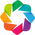

In [6]:
import clearwater_riverine as cwr

### Import ClearWater-Modules

We will also need to install Clearwater Modules' `Energy Budget` module. While this package is also still under development, the best way to install is with `conda develop`. You will need to clone the [ClearWater Modules](https://github.com/EcohydrologyTeam/ClearWater-modules) repository. Then, use conda develop pointing to the path of your `clearwater-modules` folder like below.

NOTE: You will need to find this path yourself. Remember that if your path has any blank spaces, you must enclose the path with quotes.

In [ ]:
!conda develop '/Users/aaufdenkampe/Documents/Python/ClearWater-modules/src'

In [ ]:
### Alternative to using "conda develop" command to populate conda.pth file

##### Please INPUT your local path to the cloned ClearWater-modules repository
scr_path_to_ClrWtrMdls_str = 'd:/Clearwater/ClearWater-modules/src'
scr_path_to_ClrWtrMdls = Path(scr_path_to_ClrWtrMdls_str)
#####

#add needed path info to conda.pth file
src_path_str_to_ClrWtrMdls = os.fspath(scr_path_to_ClrWtrMdls)
with open(conda_pth_filePath, 'a') as file:
    file.write(src_path_str_to_ClrWtrMdls)
    file.write('\n')
    print('conda.pth file has been modified')


conda.pth file has been modified


You now need to restart the Python kernel for this notebook, if the path didn't already exist.

In [ ]:
from clearwater_modules.nsm1.model import NutrientBudget
from clearwater_modules.base import Model

## Instantiate Models
### Clearwater-Riverine

Ensure that you have followed the instructions in the Data Availability Section, and that you have all files downloaded from the [Google Drive](https://drive.google.com/drive/folders/19uCjAJPZh4g6r1ZWzk1D_B8jZGluSc4N?usp=drive_link) for `sumwere_creek_coarse_p48_NSMI` and saved/unzipped to your local directory `examples/data_temp`. For a more detailed explanation of all the steps in this process, please see [01_getting_started_riverine.ipynb](./01_getting_started_riverine.ipynb).

This example sets up the model using a config file.

In [ ]:
model_name = 'sumwere_creek_coarse_p48_NSMI'

In [ ]:
# required for riverine
test_case_path = project_path / 'examples/data_temp' / model_name
riverine_config = test_case_path / 'demo_config.yml'

# requierd information for modules
    # please note that wetted surface area and air temp are not being used in this
    # simulation, but will be used in another example of NSMI

wetted_surface_area_path = test_case_path / "wetted_surface_area.zarr"
q_solar_path = test_case_path / 'cwr_boundary_conditions_q_solar_p28.csv'
air_temp_path = test_case_path / 'cwr_boundary_conditions_TairC_p28.csv'

In [ ]:
start_index = int(8*60*(60/30))  # start at 8:00 am on the first day of the simulation (30 second model)
end_index = start_index + int(24*60*(60/30))  # end 24 hours later (30 second model)

In [ ]:
%%time
transport_model = cwr.ClearwaterRiverine(
    config_filepath = riverine_config,
    verbose=True,
    datetime_range= (start_index, end_index)
)

The Clearwater Riverine currently has the cell surface area, not the *wetted* cell surface area, as required for TSM. Ultimately, we will work on incorporating this calculation into Clearwater Riverine; however, for the sake of this example, we have the wetted surface areas saved in a zarr. This example of NSMI does not use wetted cell surface area, but we are leaving it in this notebook because a future example will couple TSM and NSMI.

In [ ]:
wetted_sa = xr.open_zarr(wetted_surface_area_path)
wetted_sa = wetted_sa.compute()

In [ ]:
wetted_sa_subset = wetted_sa.isel(time=slice(start_index, end_index+1))

In [ ]:
transport_model.mesh['wetted_surface_area'] = xr.DataArray(
    wetted_sa_subset['wetted_surface_area'].values,
    dims=('time', 'nface')
)

In [ ]:
transport_model.mesh

### Clearwater-Modules

#### Initial State Values
The initial state values come from Clearwater-riverine mesh at the first timestep. First, let's define the variables that will be passed from Riverine to Modules and note any differences in naming conventions between our models:

In [ ]:
riverine_to_modules = [
    'Ap',
    'DOX',
    'NH4',
    'NO3',
    'TIP',
    'Ab',
    'OrgN',
    'N2',
    'OrgP',
    'POC',
    'DOC',
    'DIC',
    'POM',
    'CBOD',
    'PX',
    'Alk',
    'water_temp_c',
    'volume',
    'surface_area'
]

modules_to_riverine_matching = {
    'water_temp_c': 'temperature',
    'surface_area': 'wetted_surface_area'
}

In [ ]:
# Provide xr.data array values for initial state values
initial_state_values = {}
for state_variable_name in riverine_to_modules:
    if state_variable_name in modules_to_riverine_matching:
        riverine_key = modules_to_riverine_matching[state_variable_name]
    else:
        riverine_key = state_variable_name

    initial_state_values[state_variable_name] = transport_model.mesh[riverine_key].isel(
        time=0,
        nface=slice(0, transport_model.mesh.nreal+1)
    )

In [ ]:
# View the initial state values
initial_state_values.keys()

#### Meteorological Parameters
The meteorological parameters that we'll be adjusting for this model is `q_solar`. In this example, `q_solar` is pulled from meteorological stations in Arizona. 

We will need to interpolate these datasets to our model timestep. First, we create a time index from our transport model's xarray time coordinate to interpolate our data to:

In [ ]:
xarray_time_index = pd.DatetimeIndex(
    transport_model.mesh.time.values
)

Next, interpolate the meteorological station data to the same timestep as our model. To simplify this process in this example, we leverage the `process_meteo_data` function in the shared modules within this example folder.

In [ ]:
# Read CSV data into pandas dataframes
q_solar = process_meteo_data(
    q_solar_path,
    xarray_time_index,
    'q_Solar'
)


Finally, we can create dictionaries containing all meteorological data and the initial conditions. These will be used as inputs to Clearwater Modules. 

In [ ]:
# process for clearwater-modules input
q_solar_array = q_solar.q_solar.to_numpy()

# for each individual timestep
all_meteo_params = {
    'q_solar': q_solar_array,
}

# for initial conditions
initial_meteo_params = {
    'q_solar': q_solar_array[0],
}

#### Define Input Parameters

Clearwater Modules has many input parameters for NSMI that have default values. We may want to specify or update some of these default values, which we can do with dictionaries.

Here, we will provide algae parameters and global parameters, and global variables:

In [ ]:
algae_parameters = {
    'AWd': 100,
    'AWc': 40,
    'AWn': 7.2,
    'AWp': 1,
    'AWa': 1000,
    'KL': 10,
    'KsN': 0.04,
    'KsP': 0.0012,
    'mu_max_20': 1,
    'kdp_20': 0.15,
    'krp_20': 0.2,
    'vsap': 0.15,
    'growth_rate_option': 3,
    'light_limitation_option': 1 
    }

In [ ]:
global_parameters = {
    'use_NH4': True,
    'use_NO3': True, 
    'use_OrgN': False,
    'use_OrgP': False,
    'use_TIP': True,  
    'use_SedFlux': False,
    'use_DOX': True,
    'use_Algae': True,
    'use_Balgae': False,
    'use_POC': False,
    'use_DOC': False,
    'use_DIC': False,
    'use_N2': False,
    'use_Pathogen': False,
    'use_Alk': False,
    'use_POM': False,
    'use_CBOD': False 
}

In [ ]:
global_vars = {
    'vson': 0.01,
    'vsoc': 0.01,
    'vsop': 0.01,
    'vs': 0.01,
    'SOD_20': .5,
    'SOD_theta': 1.047,
    'vb': 0.01,
    'fcom': 0.4,
    'kaw_20_user': 0,
    'kah_20_user': 1,
    'hydraulic_reaeration_option': 1,
    'wind_reaeration_option': 1,    
    'dt': 0.0003472222, #this is 30 seconds in days: 1/((24*60*60)/30)
    'depth': 1.5, #this is the default depth; future example will use hydro output
    'TwaterC': 25, #this is the default water temp; future example will couple with TSM output
    'theta': 1.047,
    'velocity': 1, #this is the default velocity; future example will use hydro output
    'flow': 150,
    'topwidth': 100,
    'slope': .0002,
    'shear_velocity': 0.05334,
    'pressure_atm': 1013.25,
    'wind_speed': 3,
    'q_solar': initial_meteo_params['q_solar'],
    'Solid': 1,
    'lambda0': 0.02,
    'lambda1': 0.0088,
    'lambda2': 0.054,
    'lambdas': 0.056,
    'lambdam': 0.174, 
    'Fr_PAR': 0.47
}

View a full list of optional input parameters below:

In [ ]:
NutrientBudget.__init__

#### Instantiate Clearwater Modules
We instantiate Clearwater Modules with the following:
* `time_steps` (required): the number of timesteps to run. 
* `initial_state_values` (required): our initial conditions for each state variable will be used here
* `updateable_static_variables` (optional): by default, the global variables are static in NSMI. If we want these to update over time, we must provide a list of variables that we want to be updateable as input when instantiating the model.
* `algae_parameters` (optional): update parameters for algae. If not provided, all algae parameters will fall to default values.
* `global_parameters` (optional): update global parameters. If not provided, all global parameters will fall to default values.
* `global_variables` (optional): update global variables. If not provided, all values will fall to default values.
* `track_dynamic_variables` (optional): boolean indicating whether or not the user wants to track all intermediate information used in the calculations. We set this to `False` to save on memory.
* `time_dim` (optional): the model timestep


In [ ]:
time_steps = len(transport_model.mesh.time)

In [ ]:
reaction_model = NutrientBudget(
    time_steps=time_steps,
    initial_state_values=initial_state_values,
    updateable_static_variables=['q_solar'],
    algae_parameters=algae_parameters,
    global_parameters=global_parameters,
    global_vars = global_vars,
    track_dynamic_variables=False,
    time_dim='seconds'
)

## Couple Models

### Set-Up Coupling Function
Now that we have instantiated both our `Clearwater-Riverine` and `Clearwater-Modules` models, we can couple them. We will do so using the `run_n_timesteps` function, which runs `n` number of timesteps, with the following process:
1. Optionally sets up a logger. 
2. Top of the timestep: Increment the transport model (Riverine). After the first timestep, information from Clearwater-Modules will be passed back into Clearwater-Riverine.
3. Create inputs for Clearwater Modules with outputs from Clearwater Riverine and meteorological data
4. Bottom of the tiemestep: Increment the reaction model (Modules).
5. Create inputs for Clearwater Riverine with outputs from Clearwater Modules.

See [03_coupling_riverine_modules_tsm.ipynb](./03_coupling_riverine_modules_tsm.ipynb) for a full description of all inputs to the `run_n_timesteps` function.

In [ ]:
def run_n_timesteps(
    time_steps: int,
    reaction: Model,
    transport: cwr.ClearwaterRiverine,
    meteo_params: dict,
    riverine_to_modules: list,
    modules_to_riverine: list,
    modules_to_riverine_matching={},
    concentration_update=None,
    logging=False,
    log_file_name='log',
    logging_interval=5000,
):
    """Function to couple Clearwater Riverine and Modules for n timesteps."""

    # 1. Set up logger
    if logging:
        logger = setup_function_logger(f'{log_file_name}')

    # Loop through all timesteps
    for i in range(1, time_steps):
        if logging:
            if i % logging_interval == 0:
                status = {
                    'timesteps': i,
                    'cwr': transport.mesh.nbytes * 1e-9,
                    'cwm': reaction.dataset.nbytes*1e-9,
                }
                logger.debug(status)

        # 2. Top of timestep: Update transport model
        transport.update(concentration_update)

        # 3. Update state values
        # 3.1 Update using outputs from Clearwater Riverine
        updated_state_values = {}
        for state_variable_name in riverine_to_modules:
            if state_variable_name in modules_to_riverine_matching:
                riverine_key = modules_to_riverine_matching[state_variable_name]
            else:
                riverine_key = state_variable_name
            updated_state_values[state_variable_name] = transport.mesh[riverine_key].isel(
                    time=i,
                    nface=slice(0, transport.mesh.nreal + 1)
            )

        # 3.2 Update meteorological inputs
        for meteo_param in meteo_params.keys():
            updated_state_values[meteo_param] = xr.full_like(
                updated_state_values[riverine_to_modules[0]],
                meteo_params[meteo_param][i]
            )

        # 4. Bottom of timestep: update energy budget (TSM)
        reaction.increment_timestep(updated_state_values)

        # 5. Prepare data for input back into Riverine
        concentration_update = {}
        for variable in modules_to_riverine:
            if variable in modules_to_riverine_matching:
                riverine_key = modules_to_riverine_matching[variable]
            else:
                riverine_key = variable

            reaction.dataset[variable] = reaction.dataset[variable].where(
                ~np.isinf(reaction.dataset[variable]),
                transport.mesh[riverine_key].isel(
                    nface=slice(0, transport.mesh.nreal+1),
                    time=i
                )
            )
            reaction.dataset[variable] = reaction.dataset[variable].fillna(
                transport.mesh[riverine_key].isel(
                    nface=slice(0, transport.mesh.nreal+1),
                    time=i
                )
            )
            concentration_update[riverine_key] = reaction.dataset[variable].isel(seconds=i)


### Run the Coupling Function
Earlier in the notebook, we set up most of what we need to couple the models. However, we still need to define a few key inputs that help pass information back and forth between Clearwater Riverine with the following input parameters:
* `riverine_to_modules`: Defined above. 
* `modules_to_riverine`: We are passing several variables from Modules back to Riverine, which we will still need to define.
* `modules_to_riverine_matching`: Defined above.

In [ ]:
riverine_to_modules = riverine_to_modules[:-3]

In [ ]:
modules_to_riverine = ["Ap", "DOX", "NH4", "NO3", "TIP"]

In [ ]:
%%time
run_n_timesteps(
    time_steps=time_steps,
    reaction=reaction_model,
    transport=transport_model,
    meteo_params=all_meteo_params,
    riverine_to_modules=riverine_to_modules,
    modules_to_riverine=modules_to_riverine,
    modules_to_riverine_matching=modules_to_riverine_matching
)

In [ ]:
zarr_outpath = test_case_path / 'output.zarr'
netCDF_outpath = test_case_path / 'output.nc'
transport_model.finalize(True, zarr_outpath)
transport_model.finalize(True, netCDF_outpath)

#open "03_coupling_riverine_NSM_modules_(2_plotSimulation).ipynb" to
#load save model results and plot results